#Librerías

In [1]:
!pip install geopandas
!pip install alphashape
!pip install kneed
!pip install unidecode
!pip install lifelines

     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.3 MB 57.4 MB/s 
     |████████████████████████████████| 638 kB 5.4 MB/s 
     |████████████████████████████████| 994 kB 34.6 MB/s 
     |████████████████████████████████| 235 kB 5.5 MB/s 
     |████████████████████████████████| 348 kB 5.4 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=34efb6f447c6904d931f0e7a51180b31c8a37679d3dd5761b5c4ed2bc3be06f8
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [2]:
#Algoritmos de clasificación
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from geopy.distance import geodesic 

from scipy.spatial import distance_matrix
import mpl_toolkits

# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
from branca.element import Template, MacroElement

# De ley
import numpy as np
import pandas as pd
import random
import math
import collections
import time 
import unidecode

#Mapas
import alphashape
import folium
import geopandas as gpd
from geopy.distance import geodesic

from shapely.geometry import Polygon
from folium.plugins import MarkerCluster
from urllib.parse import urlencode, urlparse, parse_qsl
import requests
from itertools import chain
from kneed import DataGenerator, KneeLocator

import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, mean_squared_error, recall_score

import random
from sklearn.model_selection import GridSearchCV
from scipy import stats

from datetime import datetime
from google.colab import files

import random
import pickle

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
from scipy import stats

# Lectura

In [5]:
def categorias_p_porciento(df, c, p):
  # Número de datos donde se acumula el p porciento del total de datos
  n_registros = round(df.shape[0]*p, 0)

  # Calcular la frecuencia para cada categoría
  df_aux = df[c].value_counts().to_frame()
  df_aux.rename(columns={c: 'frecuencia'}, inplace=True)
  df_aux.reset_index(inplace=True)
  df_aux.rename(columns={'index': c}, inplace=True)

  lst_categorias = []

  # registros acumulados
  n_cum = 0
  for i in range(0, df_aux.shape[0]):
    if n_cum < n_registros:
      #print(df_aux.iloc[i][0])
      lst_categorias.append(df_aux.iloc[i][0])
      n_cum = n_cum + df_aux.iloc[i][1]

  # Crear columnas columna de otros
  df[c+'_OTROS'] = 0
  df[c+'_OTROS'].loc[ ~df[c].isin(lst_categorias) ] =1

  # Crear columnas dummies para categorías donde se acumula el p porciento de los datos
  for c1 in lst_categorias:
    df[c+'_'+c1] = 0
    df[c+'_'+c1].loc[ df[c] == c1] =1
  return df

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
HT_PATH = '/content/drive/MyDrive/Hackaton BBVA'
VR_PATH = '/content/drive/MyDrive/Reto Vinculación rentable'

In [ ]:
# fisicas = pd.read_csv('/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas/bbva_fisicas.csv')
# morales = pd.read_csv('/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas/bbva_morales.csv')

In [ ]:
fisicas = pd.read_csv('/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas/bbva_fisicas_cl.csv')
# morales = pd.read_csv('/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas/bbva_morales_cl.csv')

# Tratamiento

In [ ]:
cats_ = ['UBIGEO_DIRECCION','SEGMENTO_COMERCIAL','RIESGO1','RIESGO2','labels']

for co_c in cats_:
  fisicas[co_c] = fisicas[co_c].astype(str)

In [ ]:
labels = fisicas['labels']

In [ ]:
# fisicas1 = None

In [ ]:
ids_cols = ['CODIGO_CLIENTE']

fis_d = fisicas.describe()
dis_disc = [x for x in fisicas.columns if x not in list(fis_d.columns)+ids_cols]

for col_d in dis_disc:
  fisicas = categorias_p_porciento(fisicas,col_d ,.85)
  fisicas = fisicas.drop(columns=[col_d])

In [ ]:
fisicas['ABANDONO']= fisicas['ABANDONO'].apply(lambda x: min(x,1))

In [ ]:
fisicas.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
no_prods = fisicas[['CODIGO_CLIENTE','PERIODO']].value_counts().reset_index()
no_prods.columns = ['CODIGO_CLIENTE','PERIODO','NO_PRODS']
no_prods = no_prods.sort_values(['CODIGO_CLIENTE','PERIODO'], ascending=True)

In [ ]:
no_prods['NO_PRODS_1'] = no_prods['NO_PRODS'].shift(-1)
no_prods['NO_P_DIFF'] = no_prods['NO_PRODS']-no_prods['NO_PRODS_1']
Fechas_Cambios = no_prods[(no_prods['NO_P_DIFF']!=0)& (no_prods['PERIODO']!=202106)].dropna()

In [ ]:
g_var = [x for x in fisicas.columns if 'NUMERADOR_RATIO_RENTABILIDAD' in x][-1]
c_var = [x for x in fisicas.columns if 'DENOMINADOR_RATIO_RENTABILIDAD' in x][-1]

In [ ]:
#NUMERADOR_RATIO_RENTABILIDAD
Vars_R = pd.pivot_table(fisicas, columns=['PERIODO'], index=['CODIGO_CLIENTE'],
                        values = [g_var,c_var], aggfunc='sum')
Vars_R_g = Vars_R[g_var].reset_index()
Vars_R_c = Vars_R[c_var].reset_index()

Vars_R_g = Vars_R[g_var].reset_index()
Vars_R_c = Vars_R[c_var].reset_index()

In [ ]:
#variables de % de cambio
prds = list(renta.PERIODO.unique())

# Construir Data Set
n_vars = []
for cl1, cl2 in zip(prds[:(len(prds)- 1)],prds[1:]):
  val_r = Vars_R_g[cl1]/Vars_R_g[cl2]
  nom_v = 'Ratio_'+str(cl1)+'_'+str(cl2)
  n_vars.append(nom_v)
  Vars_R_g[nom_v] = val_r

In [ ]:
# Guarda los 3 meses anteriores y asigna la va. obj
acum_ = pd.DataFrame()
tresh = 1.05

id_aa = ['CODIGO_CLIENTE']

for i in range(len(n_vars)-3):
  actual = i+3
  anteriores = n_vars[i:i+3]
  Sub_g_1 = Vars_R_g[Vars_R_g[n_vars[actual]]>tresh][id_aa+anteriores]
  Sub_g_1['obj']=1
  Sub_g_2 = Vars_R_g[Vars_R_g[n_vars[actual]]<=tresh][id_aa+anteriores]
  Sub_g_2['obj']=0
  acum = pd.concat([Sub_g_1,Sub_g_2]).dropna()
  acum.columns = id_aa+['p_m3','p_m2','p_m1','obj']
  acum['PERIODO'] = int(n_vars[actual].split('_')[1])
  acum_= pd.concat([acum_,acum])

acum_.replace([np.inf, -np.inf], np.nan, inplace=True)
acum_.dropna(inplace=True)


In [ ]:
acum_ = acum_.merge(Fechas_Cambios.drop(columns=['NO_PRODS','NO_PRODS_1']), 
                    on =['CODIGO_CLIENTE','PERIODO'], how='left').fillna(0)

acum_ = acum_.merge(fisicas, on=['PERIODO','CODIGO_CLIENTE'])

# Pronóstico

In [ ]:
semilla=111

In [ ]:
X = acum_.drop(columns='obj')
y = acum_['obj']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=112)

In [ ]:
#GridSearch
rf = RandomForestRegressor(random_state=np.random.RandomState(seed=semilla))
# param_grid = {'n_estimators':range(50,550,120),'max_depth':range(3,11,3)}
param_grid = {'n_estimators':[150],'max_depth':[7]}
cv = GridSearchCV(rf,param_grid=param_grid,cv=5,n_jobs=-1, verbose=2)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False,
                                             random_state=RandomState(MT19937) at 0x7F670B72FD10,
                               

In [ ]:
#Variables importantes
importances = list(cv.best_estimator_.feature_importances_)
feature_list=list(X.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
var_impr_gral=[pair[0] for pair in feature_importances if pair[1]>0]
var_import=pd.DataFrame(feature_importances, columns=['Variable','Importancia'])
var_import_may_0=var_import[var_import['Importancia'] > 0]
var_import_may_0

,Variable,Importancia
0,p_m1,0.25
1,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,0.17
2,PERIODO,0.13
3,PERDIDA_ESPERADA,0.12
4,p_m2,0.06
5,NO_P_DIFF_x,0.05
6,NO_P_DIFF_y,0.05
7,SALDO_MEDIO_TARJETAS,0.04
8,SALDO_MEDIO_INVERSION_RENTABLE,0.04
9,SALDO_MEDIO_CONSUMO,0.02


In [ ]:
y_pred = cv.best_estimator_.predict(X_test)
r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')

0.2018786563834455

In [ ]:
predicciones = y_pred = cv.best_estimator_.predict(X)
predicciones = [0 if x<.5 else 1 for x in predicciones]
rmse = mean_squared_error(y_true  = y, y_pred  = predicciones, squared = False) 
print(f"El error (rmse) de traint es: {rmse}")

predicciones = cv.predict(X = X_test)#Error de test
# predicciones = y_pred = cv.best _estimator_.predict(X_)
y_test_pred = predicciones = [0 if x<.5 else 1 for x in predicciones]
rmse = mean_squared_error(y_true  = y_test,y_pred  = predicciones,squared = False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de traint es: 0.5171113203049812
El error (rmse) de test es: 0.5193309734386955


Matriz de Confusion


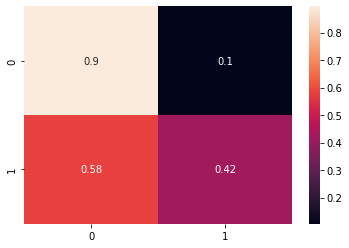


precision: 0.6802884615384616
exhaustividad: 0.4200148415138344
ROC AUC: 0.6575744403559259
accuracy in test: 0.7302953400272169


In [ ]:
# Imprimir metricas
print('Matriz de Confusion')
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
sns.heatmap(confusion_matrix(y_test, y_test_pred, normalize='true'), annot=True);
plt.show()
print('')

print('precision:', tp/(tp+fp))
print('exhaustividad:', tp/(tp+fn))
print('ROC AUC:', roc_auc_score(y_test, y_test_pred))
# print('accuracy in train:', accuracy_score(y_train_pred, y_train))
print('accuracy in test:', accuracy_score(y_test_pred, y_test))

## LIFE TIME VALUE

In [ ]:
fisicas['labels'] = labels

In [ ]:
SURV = pd.pivot_table(fisicas, index=['CODIGO_CLIENTE','labels'],
                      columns = 'ABANDONO',
                      values='ATT',aggfunc=len,
                      fill_value=0).reset_index()
SURV[1] = SURV[1].apply(lambda x: min(1,x))
SURV[0] = SURV[0].apply(lambda x: min(18,x))

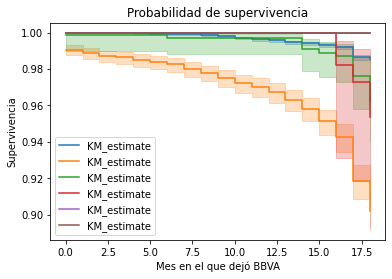

In [ ]:
for llab in fisicas.labels.unique():

  kpl_ = kmf.fit(X[SURV['labels']==llab], event_observed = Y[SURV['labels']==llab])

  for i in range(1,18):
    kp_tiempo = kpl_.survival_function_at_times(i)
    kp_tiempo = kp_tiempo*100
    if all(kp_tiempo <= proba_fore):
      break
  gana[llab] = i
  kpl_.plot()
  plt.title("Probabilidad de supervivencia")
  plt.xlabel("Mes en el que dejó BBVA")
  plt.ylabel("Supervivencia")

  
plt.show()

In [ ]:
kmf = KaplanMeierFitter()
X = SURV[0]
Y = SURV[1]
gana = {}

proba_fore = 99.75
for llab in fisicas.labels.unique():

  kpl_ = kmf.fit(X[SURV['labels']==llab], event_observed = Y[SURV['labels']==llab])

  for i in range(1,18):
    kp_tiempo = kpl_.survival_function_at_times(i)
    kp_tiempo = kp_tiempo*100
    if all(kp_tiempo <= proba_fore):
      break
  gana[llab] = i
  kpl_.plot()
  plt.title("Probabilidad de supervivencia")
  plt.xlabel("Mes en el que dejó BBVA")
  plt.ylabel("Supervivencia")

  
plt.show()

join_tiempo_clus = pd.DataFrame(gana, index=[0]).transpose().reset_index()
join_tiempo_clus.columns = ['labels','tiempo_pron']
fisicas = fisicas.merge(join_tiempo_clus, on = 'labels')

In [ ]:
vars_aaa = ["EDAD", "SALDO_MEDIO_VISTA", "SALDO_MEDIO_AUTOS", "SALDO_MEDIO_TARJETAS", "HIPOTECARIO_RENT_PROD", 
             "AUTOS_RENT_PROD", "CARTERA_RENT_PROD", "COMEXT_RENT_PROD", "CONSUMO_RENT_PROD", "LEASING_RENT_PROD",
             "NO_PRODUCTOS_RENT_PROD", "FAM_GLOBAL","NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD", "DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD",
             "ABANDONO","ATT","VINCULACION_PN"]

In [ ]:
vars_aaa =  [z for z in vars_aaa if z!= g_var]

fisicas_agg_val = pd.pivot_table(fisicas, index = ['CODIGO_CLIENTE','NUMERO_DOCUMENTO','labels','tiempo_pron']+vars_aaa,
                                 values=g_var, aggfunc='mean').reset_index()

fisicas_agg_val['Rentabilidad_valor_presente'] = fisicas_agg_val[g_var]*fisicas_agg_val['tiempo_pron']*proba_fore/100

fisicas_agg_val['Rentabilidad_valor_presente'] = [0 if y ==1 else x for x, y in zip(fisicas_agg_val['Rentabilidad_valor_presente'],
                                                                                    fisicas_agg_val['ABANDONO'])]

# fisicas_agg_val.to_csv(HT_PATH+'/Tablas_guardadas/bbva_fisicas_cl_r.csv')

# Otras vars

In [147]:
fisicas_agg_val=pd.read_csv(HT_PATH+'/Tablas_guardadas/bbva_fisicas_cl_r.csv')
estrat = pd.read_excel('/content/estrategias.xlsx')

In [148]:
fisicas_agg_val.labels.value_counts()

1    108817
0     58307
3      7883
4      1854
2        42
Name: labels, dtype: int64

In [149]:
fisicas_agg_val =fisicas_agg_val[['CODIGO_CLIENTE', 'NUMERO_DOCUMENTO', 'labels',
       'tiempo_pron', 'EDAD', 'SALDO_MEDIO_VISTA', 'SALDO_MEDIO_AUTOS',
       'SALDO_MEDIO_TARJETAS', 'HIPOTECARIO_RENT_PROD', 'AUTOS_RENT_PROD',
       'CARTERA_RENT_PROD', 'COMEXT_RENT_PROD', 'CONSUMO_RENT_PROD',
       'LEASING_RENT_PROD', 'NO_PRODUCTOS_RENT_PROD', 'FAM_GLOBAL',
       'DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD', 'ABANDONO', 'ATT',
       'VINCULACION_PN', 'NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD',
       'Rentabilidad_valor_presente']]

In [150]:
estrat.columns = ['labels', 'Nombre_clus', 'Nivel_Rent', 'Estrategia', 'Productos']
estrat['Estrategia'] = [str(x).replace(',','') for x in estrat.Estrategia]

In [151]:
pr = list(np.percentile(fisicas_agg_val['Rentabilidad_valor_presente'],q = [22,66]))
pr= list(set(pr))

In [152]:
r_leve = fisicas_agg_val['Rentabilidad_valor_presente']

if len(pr)==1:
  fisicas_agg_val['Nivel_Rent'] = ['BAJO' if i <=pr[0] else 'ALTO' for i in r_leve]
else:
  fisicas_agg_val['Nivel_Rent'] = ['BAJO' if i <=pr[0] else 'MEDIO' if i <=pr[1] else 'ALTO' for i in r_leve]

In [153]:
perfil = ['Jovenes','Clientes Buenos','Estrella','Potenciales','De Oportunidad','Desatendido']
per_asdf = {i:per for i, per in enumerate(perfil)}
per_asdf = pd.DataFrame(per_asdf,index=[0]).transpose().reset_index()
per_asdf.columns = ['labels','Nombre_clus']

In [154]:
fisicas_agg_val_ = fisicas_agg_val.merge(per_asdf, on = 'labels')

In [155]:
fisicas_agg_val_.Nombre_clus.value_counts()

Clientes Buenos    108817
Jovenes             58307
Potenciales          7883
De Oportunidad       1854
Estrella               42
Name: Nombre_clus, dtype: int64

In [156]:
# fisicas_agg_val_ = fisicas_agg_val_.drop(columns=['Nivel_Rent'])

In [157]:
estrat = estrat.drop(columns=['Nombre_clus'])

In [158]:
fisicas_agg_val_ = fisicas_agg_val_.merge(estrat, on = ['labels','Nivel_Rent'])

In [163]:
# fisicas_agg_val_.EDAD.max()

120

In [159]:
fisicas_agg_val_.Nombre_clus.value_counts()

Clientes Buenos    108817
Jovenes             58307
Potenciales          7883
De Oportunidad       1854
Estrella               42
Name: Nombre_clus, dtype: int64

In [160]:
fisicas_agg_val_.to_csv(HT_PATH+'/Tablas_guardadas/bbva_fisicas_cl_r.csv')

In [39]:
# pd.pivot_table(fisicas_agg_val,index=['labels','tiempo_pron','Nivel_Rent'], val)